# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_key import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | savanna-la-mar
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | vilyuchinsk
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | talodi
Processing Record 9 of Set 1 | newman
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | guerrero negro
Processing Record 12 of Set 1 | fort st. john
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | freeport
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | taoudenni
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | baotou
Processing Record 22 of Set 1 | sulechow
Process

Processing Record 39 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 40 of Set 4 | new norfolk
Processing Record 41 of Set 4 | afaahiti
Processing Record 42 of Set 4 | chany
Processing Record 43 of Set 4 | pandan
Processing Record 44 of Set 4 | ginir
Processing Record 45 of Set 4 | yaren
Processing Record 46 of Set 4 | launceston
Processing Record 47 of Set 4 | puerto baquerizo moreno
Processing Record 48 of Set 4 | l'ancienne-lorette
Processing Record 49 of Set 4 | ilhabela
Processing Record 0 of Set 5 | antalaha
Processing Record 1 of Set 5 | antsiranana
Processing Record 2 of Set 5 | papao
Processing Record 3 of Set 5 | nyurba
Processing Record 4 of Set 5 | mili
Processing Record 5 of Set 5 | tanjung pandan
Processing Record 6 of Set 5 | aykhal
Processing Record 7 of Set 5 | georgetown
Processing Record 8 of Set 5 | praia da vitoria
Processing Record 9 of Set 5 | west busselton
City not found. Skipping...
Processing Record 10 of Set 5 | kayangel
Processing

City not found. Skipping...
Processing Record 32 of Set 8 | mirnyy
Processing Record 33 of Set 8 | san angelo
Processing Record 34 of Set 8 | kristiansund
Processing Record 35 of Set 8 | pangody
Processing Record 36 of Set 8 | merritt island
Processing Record 37 of Set 8 | springs
Processing Record 38 of Set 8 | imperatriz
Processing Record 39 of Set 8 | shizunai-furukawacho
Processing Record 40 of Set 8 | fortuna
Processing Record 41 of Set 8 | salalah
Processing Record 42 of Set 8 | san antonio de pale
Processing Record 43 of Set 8 | at taj
Processing Record 44 of Set 8 | urangan
Processing Record 45 of Set 8 | bela
Processing Record 46 of Set 8 | we
City not found. Skipping...
Processing Record 47 of Set 8 | winnipeg
Processing Record 48 of Set 8 | alpu
Processing Record 49 of Set 8 | crane
Processing Record 0 of Set 9 | vorkuta
Processing Record 1 of Set 9 | erenhot
Processing Record 2 of Set 9 | shingu
Processing Record 3 of Set 9 | troitskoye
Processing Record 4 of Set 9 | vilyuy

Processing Record 22 of Set 12 | geraldton
Processing Record 23 of Set 12 | corning
Processing Record 24 of Set 12 | kenai
Processing Record 25 of Set 12 | chas
Processing Record 26 of Set 12 | kiunga
Processing Record 27 of Set 12 | prince rupert
Processing Record 28 of Set 12 | watertown
Processing Record 29 of Set 12 | port augusta
Processing Record 30 of Set 12 | keflavik
Processing Record 31 of Set 12 | longido
Processing Record 32 of Set 12 | malabar
Processing Record 33 of Set 12 | bataipora
Processing Record 34 of Set 12 | sola
Processing Record 35 of Set 12 | opuwo
Processing Record 36 of Set 12 | kiruna
Processing Record 37 of Set 12 | nagqu
Processing Record 38 of Set 12 | tianshui
Processing Record 39 of Set 12 | 'ain el hadjel
City not found. Skipping...
Processing Record 40 of Set 12 | umba
Processing Record 41 of Set 12 | neryungri
Processing Record 42 of Set 12 | unye
City not found. Skipping...
Processing Record 43 of Set 12 | aksu
Processing Record 44 of Set 12 | arde

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,6.86,97,100,16.64,TF,1699921719
1,savanna-la-mar,18.2190,-78.1332,28.97,89,39,2.21,JM,1699921720
2,bethel,41.3712,-73.4140,6.20,73,75,1.54,US,1699921631
3,vilyuchinsk,52.9306,158.4028,-2.26,74,100,3.16,RU,1699921723
4,grytviken,-54.2811,-36.5092,2.38,98,100,3.57,GS,1699921725


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.86,97,100,16.64,TF,1699921719
1,savanna-la-mar,18.2190,-78.1332,28.97,89,39,2.21,JM,1699921720
2,bethel,41.3712,-73.4140,6.20,73,75,1.54,US,1699921631
3,vilyuchinsk,52.9306,158.4028,-2.26,74,100,3.16,RU,1699921723
4,grytviken,-54.2811,-36.5092,2.38,98,100,3.57,GS,1699921725


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

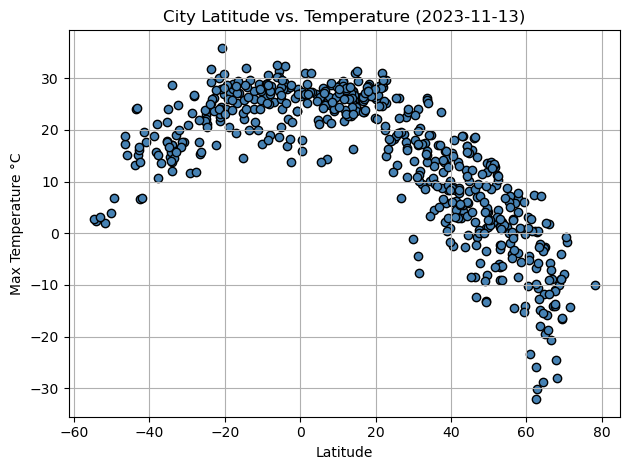

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='steelblue', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

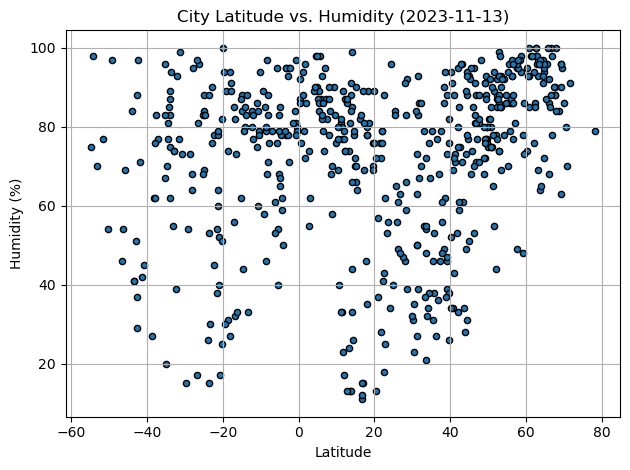

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()
date = time.strftime("%Y-%m-%d")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

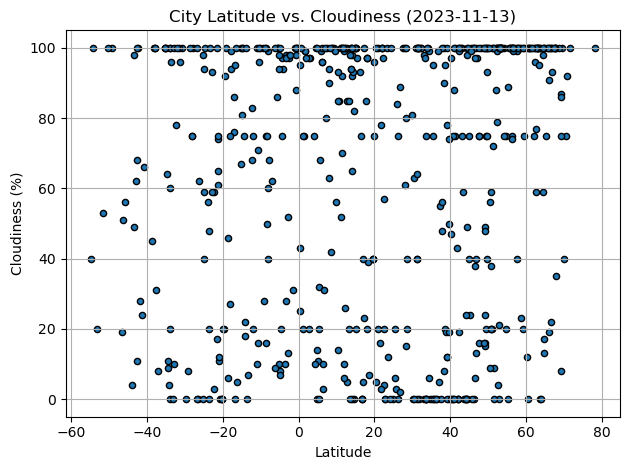

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()
date = time.strftime("%Y-%m-%d")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

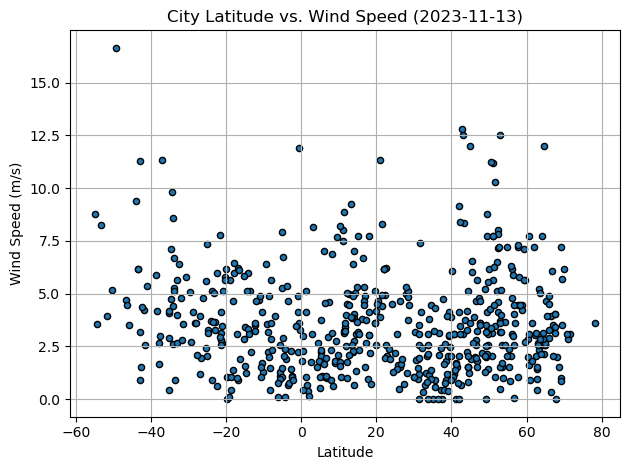

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()
date = time.strftime("%Y-%m-%d")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,savanna-la-mar,18.2190,-78.1332,28.97,89,39,2.21,JM,1699921720
2,bethel,41.3712,-73.4140,6.20,73,75,1.54,US,1699921631
3,vilyuchinsk,52.9306,158.4028,-2.26,74,100,3.16,RU,1699921723
6,olonkinbyen,70.9221,-8.7187,-1.79,70,92,2.87,SJ,1699921728
7,talodi,10.6325,30.3797,28.69,40,85,1.04,SD,1699921729


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.86,97,100,16.64,TF,1699921719
4,grytviken,-54.2811,-36.5092,2.38,98,100,3.57,GS,1699921725
5,waitangi,-43.9535,-176.5597,13.20,84,4,9.38,NZ,1699921726
12,puerto natales,-51.7236,-72.4875,1.97,77,53,3.93,CL,1699921744
14,adamstown,-25.0660,-130.1015,22.83,84,94,7.36,PN,1699921747


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8665949751950717


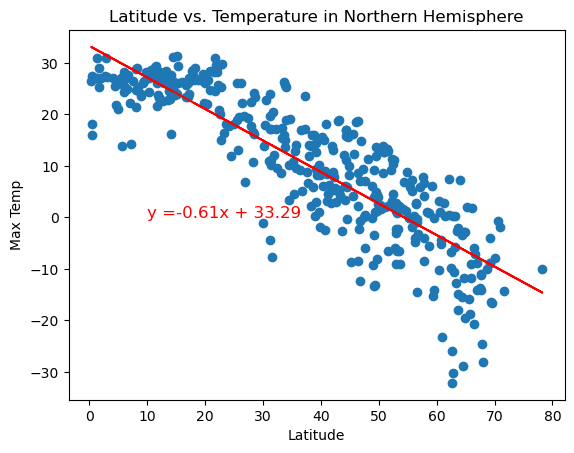

In [26]:
# Linear regression on Northern Hemisphere

linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, 0))

plt.title("Latitude vs. Temperature in Northern Hemisphere")

# Show plot
plt.show()

The r-value is: 0.6895741417899881


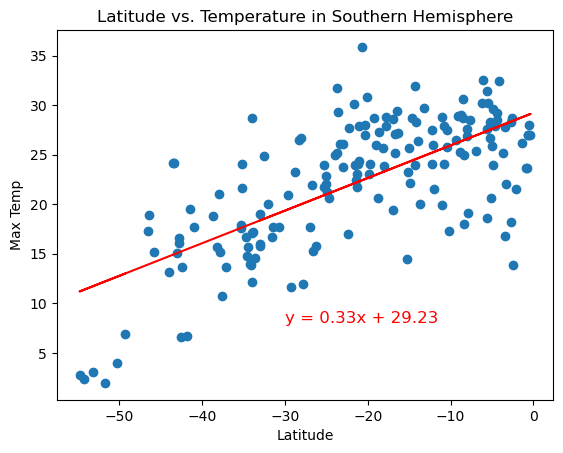

In [27]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

plt.title("Latitude vs. Temperature in Southern Hemisphere")

# Show plot
plt.show()

**Discussion about the linear relationship:**
There is strong negative correlation between latitude and temperature in the northern hempispere and strong positive correction in the southern hemisphere. This indicates that maximum temperature increase closer to the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.286070585429427


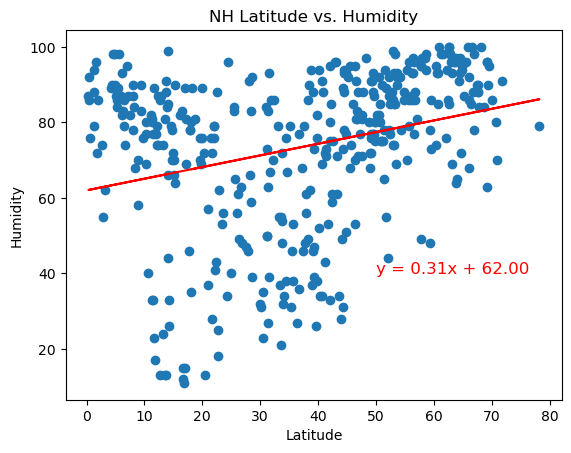

In [28]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

plt.title("NH Latitude vs. Humidity")

# Show plot
plt.show()

The r-value is: 0.16964632562293813


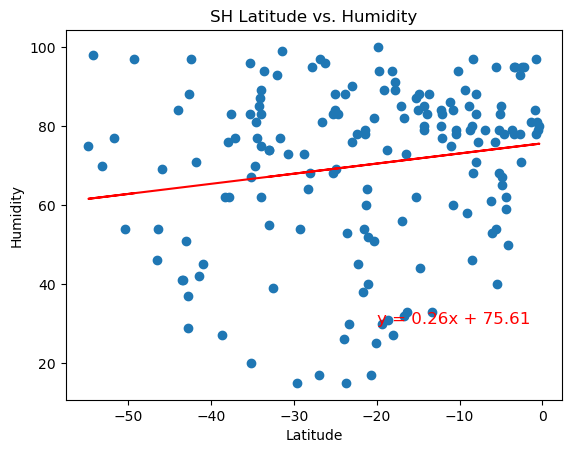

In [29]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 30))

plt.title("SH Latitude vs. Humidity")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
There is little to no relationship between humidity and latitude, the scatter points show that the data is too spread for there to be any correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12641622254153412


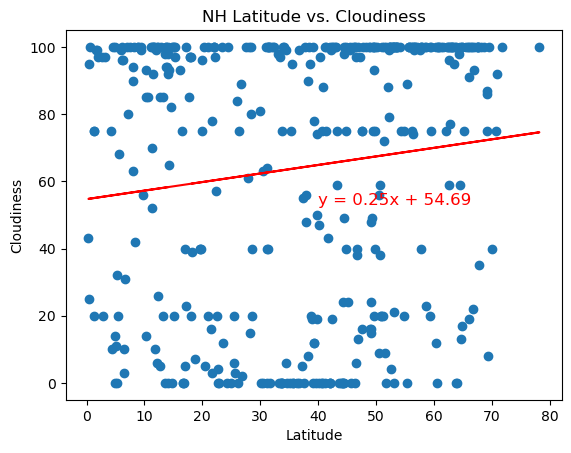

In [30]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (40, 53))

plt.title("NH Latitude vs. Cloudiness")

# Show plot
plt.show()

The r-value is: 0.1000483521130019


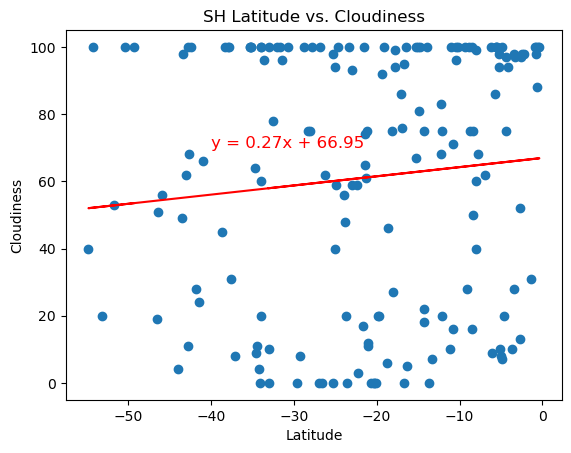

In [31]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-40, 70))

plt.title("SH Latitude vs. Cloudiness")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
There is little to no relationship between cloudiness and latitude, the scatter points show that the data is too spread for there to be any correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.09022280249199167


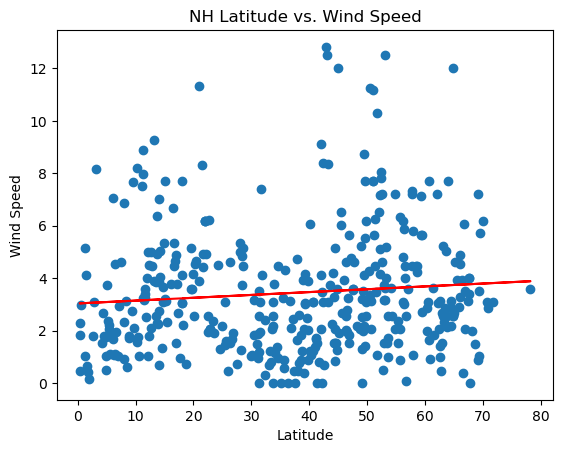

In [32]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (30, 20))

plt.title("NH Latitude vs. Wind Speed")

# Show plot
plt.show()

The r-value is: -0.3502513040177862


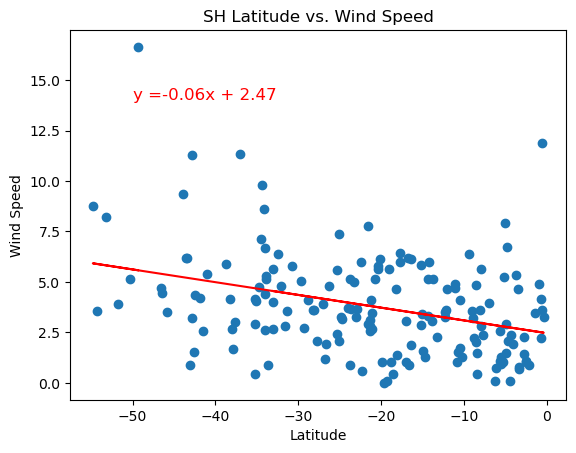

In [33]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 14))

plt.title("SH Latitude vs. Wind Speed")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
There is little to no relationship between wind speed and latitude, the scatter points show that the data is too spread for there to be any correlation.